In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-rc1   

In [9]:
import tensorflow as tf

from tensorflow.keras.models import Model
from keras import models

import numpy as np
import matplotlib.pyplot as plt 
tf.__version__

'2.0.0-rc1'

In [10]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [11]:
model = tf.keras.models.load_model('/content/gdrive/My Drive/model/resnet300ep.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 64) 0           batch_normalization[0][0]        
___________________________________________________________________________________________

In [0]:
weights = model.layers[-1].get_weights()[0]
model2 = Model(inputs=model.input, outputs=[model.layers[172].output, model.output])

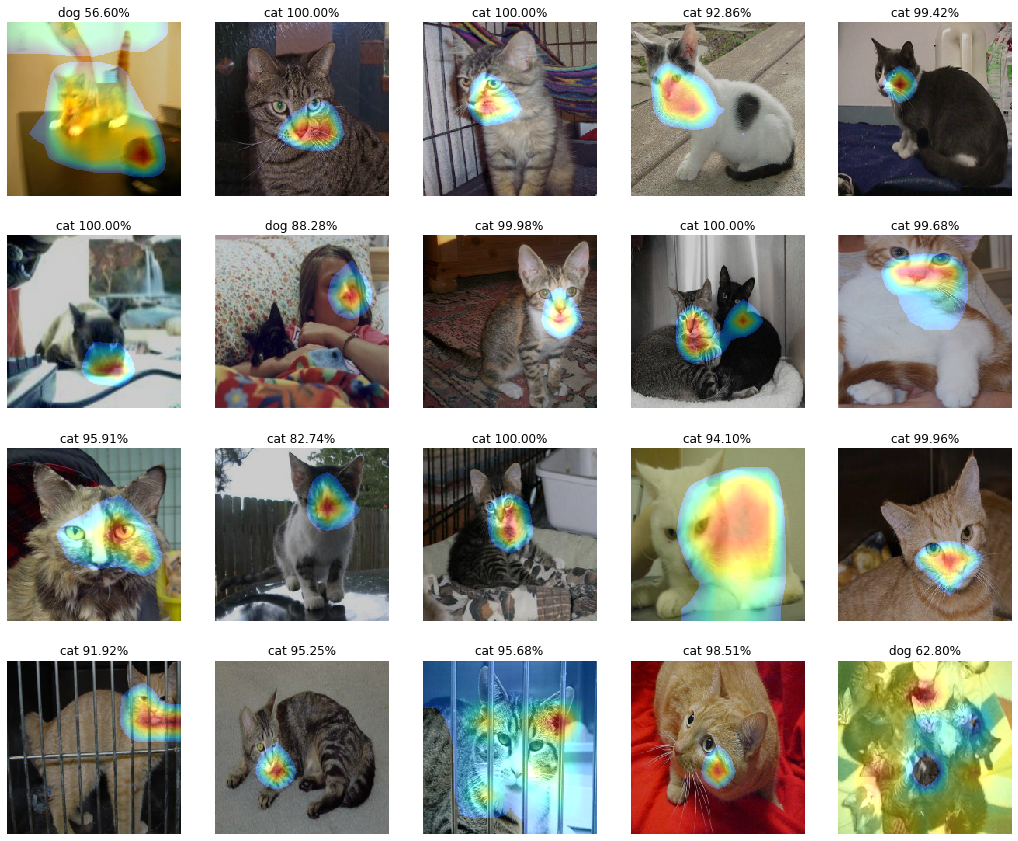

In [18]:
import cv2
plt.figure(figsize=(18, 15))
for i in range(20):
    img = cv2.imread('/content/gdrive/My Drive/dataset/test/cat/cat.%d.jpg'%(i))
    img = cv2.resize(img, (224,224))
    x = img.copy()
    x.astype(np.float32)
    x = x / 255.0
    
    [base_model_outputs, prediction] = model2.predict(np.expand_dims(x, axis=0))
    prediction = prediction[0]
    base_model_outputs = base_model_outputs[0]
    plt.subplot(4, 5, i+1)
    if prediction < 0.5:
        plt.title('cat %.2f%%' % (100 - prediction*100))
    else:
        plt.title('dog %.2f%%' % (prediction*100))

    cam = (prediction - 0.5) * np.matmul(base_model_outputs, weights)
    cam -= cam.min()
    cam /= cam.max()
    cam -= 0.2
    cam /= 0.8
    
    cam = cv2.resize(cam, (224, 224))
    heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
    heatmap[np.where(cam <= 0.2)] = 0
    
    out = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)
    plt.axis('off')
    plt.imshow(out[:,:,::-1])